In [113]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
import sys
sys.path.append("../")

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

from phonetics import utils as u
from phonetics import plots as plots

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [40]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/maria_v5'
feat_path_12 = f'{experiment_path}/feat_2d/feat_2d_layer_12.csv'

df_anotated_12 = pd.read_csv(feat_path_12, index_col=0)

In [41]:
df_grouped_2d_layer12, ph_group = u.group_vowels_consonants_ap(df_anotated_12)

vowels: ['a', 'e', 'i', 'o', 'u', '3', 'w', '0', 'y']
aspirations: ['AP']
Short pause: SP


Making a 2d plot


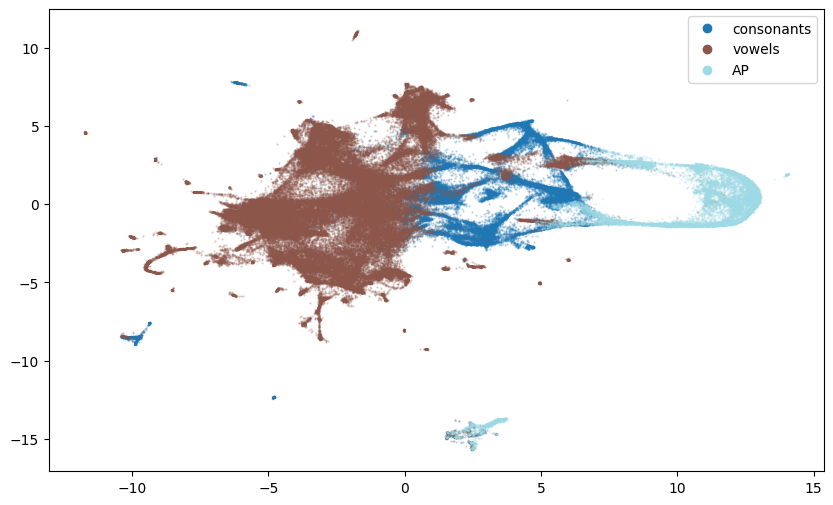

In [42]:
plots.make_tagged_LS_plot(df_grouped_2d_layer12,
                phones = ph_group,
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

In [74]:
experiment_path = f'{root}/maria_v0'
feat_path_12 = f'{experiment_path}/feat_768d/feat_768d_layer_12.csv'
feat_2d_path_12 = f'{experiment_path}/feat_2d/feat_2d_layer_12.csv'

df_anotated_12 = pd.read_csv(feat_path_12, index_col=0)
df_2d_anotated_12 = pd.read_csv(feat_2d_path_12, index_col=0)

In [67]:
X = df_anotated_12.drop(columns=['phone_base', 'song']).values

In [68]:
import numpy as np

In [110]:
norms = np.linalg.norm(X, axis=1, keepdims=True)
df_2d_anotated_12['norm'] = norms

df_filter  = df_2d_anotated_12
df_filter = df_2d_anotated_12[df_2d_anotated_12['norm'] > 6]
print(len(df_filter)/len(df_2d_anotated_12))

0.9818923440329321


In [111]:
unique_phones = list(df_filter['phone_base'].value_counts().keys())
unique_phones = [ph for ph in unique_phones if ph != 'SP']

Making a 2d plot


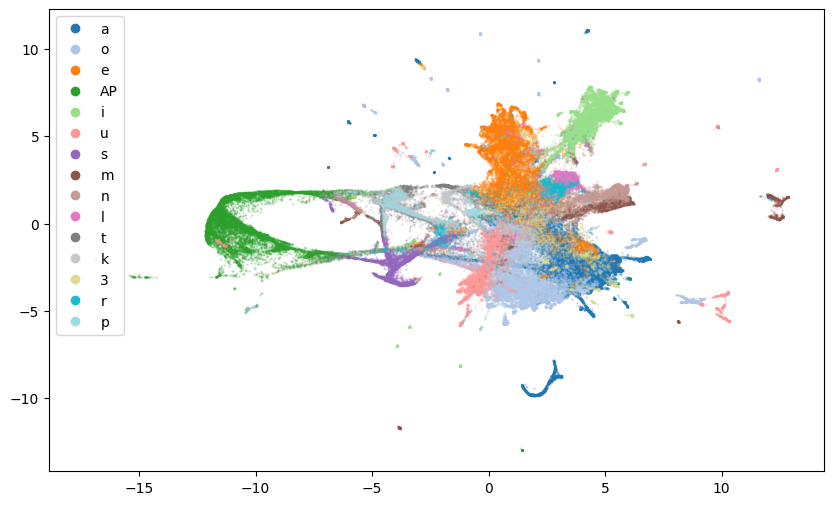

In [112]:
plots.make_tagged_LS_plot(df_filter,
                phones = unique_phones[0:15],
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

Making a 2d plot


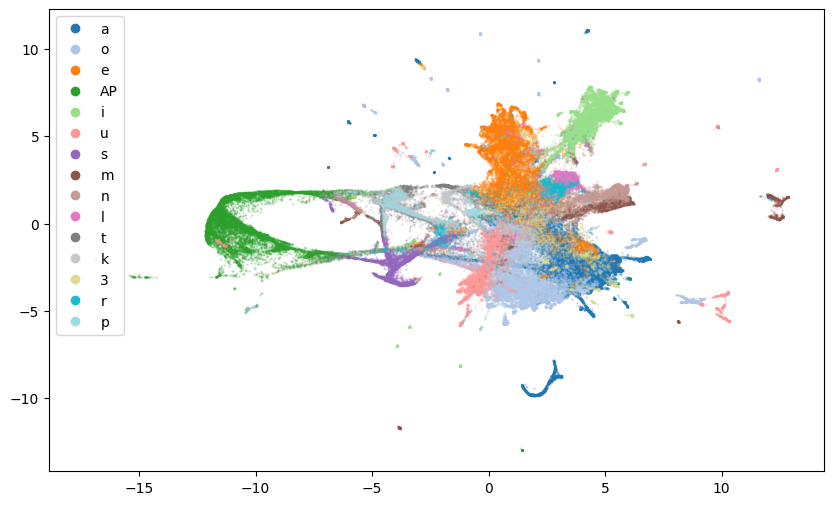

In [100]:
plots.make_tagged_LS_plot(df_filter,
                phones = unique_phones[0:15],
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                align_head=True,
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

In [10]:
df = plots.align_dancer_head(df_grouped_2d_layer12, ap_phone = 'AP')

X = df_grouped_2d_layer12[['x', 'y']].values
y = df_grouped_2d_layer12['group'].values

sample_silhouette_values = silhouette_samples(X, y)

0.2624460111411167


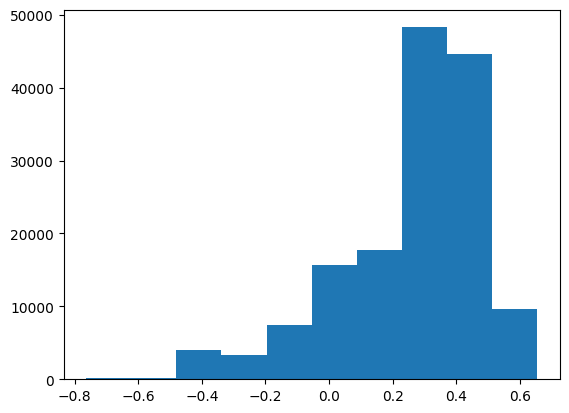

In [11]:
plt.hist(sample_silhouette_values);
print(sample_silhouette_values.mean())

In [ ]:
(silhouette_score(X, y), 
davies_bouldin_score(X, y), 
calinski_harabasz_score(X, y))

In [15]:
experiment_path = f'{root}/maria_v0'
feat_path_768d_layer_12 = f'{experiment_path}/feat_768d/feat_768d_layer_12.csv'

df_anotated_768d_layer_12 = pd.read_csv(feat_path_768d_layer_12, index_col=0)

df_grouped_768d_layer_12, ph_group = u.group_vowels_consonants_ap(df_anotated_768d_layer_12)

vowels: ['a', 'e', 'i', 'o', 'u', '3', 'w', '0', 'y']
aspirations: ['AP']
Short pause: SP


In [ ]:
X = df_grouped_768d_layer_12.drop(columns=['phone_base', 'song', 'group']).values
y = df_grouped_768d_layer_12['group'].values

sample_silhouette_768d_cosine_values = silhouette_samples(X, y, metric='cosine')

0.17564919413608182


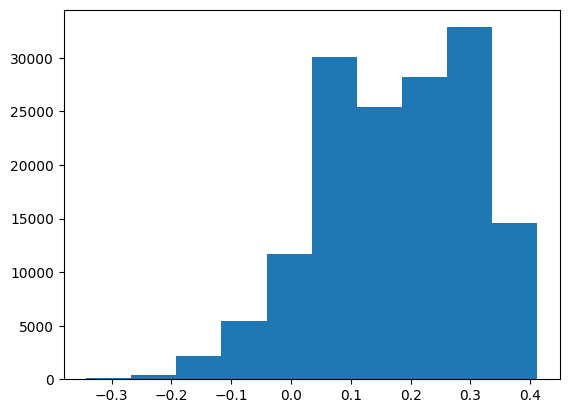

In [22]:
plt.hist(sample_silhouette_768d_cosine_values);
print(sample_silhouette_768d_cosine_values.mean())

# Clean up 

In [18]:
def assign_contiguous_groups(series):
    return series.ne(series.shift()).cumsum() - 1

In [19]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
experiment_path = f'{root}/maria_v2/feat_2d'
feat_path_12 = f'{experiment_path}/feat_2d_layer_12.csv'

df_anotated_12 = pd.read_csv(feat_path_12, index_col=0)

In [20]:
def remove_last_of_groups(df):
    """
    Removes the last element of each contiguous group of identical values.
    
    Returns a filtered Series.
    """

    series = df['phone_base']

    group_ids = series.ne(series.shift()).cumsum()
    group_sizes = group_ids.value_counts().sort_index()
    group_pos = series.groupby(group_ids).cumcount()
    group_revpos = group_sizes[group_ids.values].values - group_pos - 1

    # Keep all except the last item in each group
    mask = group_revpos > 0

    return df[mask] #series[mask].reset_index(drop=True)


In [21]:
df_cleaner = remove_last_of_groups(df_anotated_12).reset_index(drop=True)

df_cleaner = df_cleaner[df_cleaner['phone_base'] != 'SP']

In [22]:
vowels = ['a', 'e', 'i', 'o', 'u', '3', 'w', '0','y']
AP = ['AP']

df_consonant = df_cleaner[~df_cleaner['phone_base'].isin(vowels + AP)].copy()
df_vowels = df_cleaner[df_cleaner['phone_base'].isin(vowels)].copy()
df_ap = df_cleaner[df_cleaner['phone_base'].isin(AP)].copy()

df_ap['group'] = 'AP'
df_vowels['group'] = 'vowel'
df_consonant['group'] = 'consonant'

df_all = pd.concat([df_consonant, df_vowels, df_ap])

ph_group = {
    'consonants': list(df_consonant['phone_base'].unique()),
    'vowels': list(df_vowels['phone_base'].unique()),
    'AP': list(df_ap['phone_base'].unique())
    }

Making a 2d plot


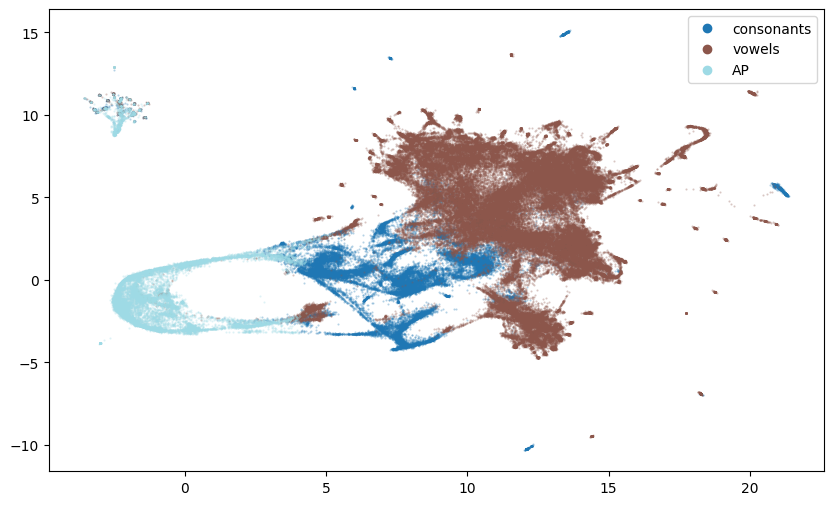

In [23]:
plots.make_tagged_LS_plot(df_all,
                phones = ph_group,
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

In [21]:
X = df_all[['x', 'y']].values
y = df_all['group'].values

In [ ]:
sample_silhouette_values = silhouette_samples(X, y)

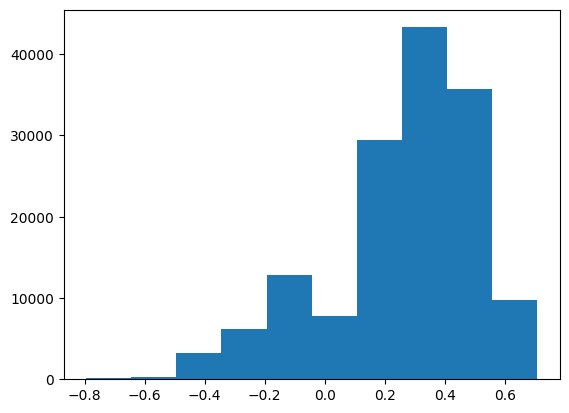

In [44]:
plt.hist(sample_silhouette_values);

In [13]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import mutual_info_score
import numpy as np

In [35]:
k = 4
df_all = df_grouped_2d_layer12
df_all = plots.align_dancer_head(df_all)

df_filter = df_all[df_all['y'] > -10]

kmeans = KMeans(n_clusters = k, 
                random_state=42)
    
X = df_filter[['x', 'y']].values

cluster_assignments = kmeans.fit_predict(X)

df_filter['k_means'] = cluster_assignments

/Users/tomasandrade/miniconda3/envs/ling_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/8k/_0xh01hd7y9bl_vjjlwxqtjr0000gn/T/ipykernel_74594/636015107.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['k_means'] = cluster_assignments


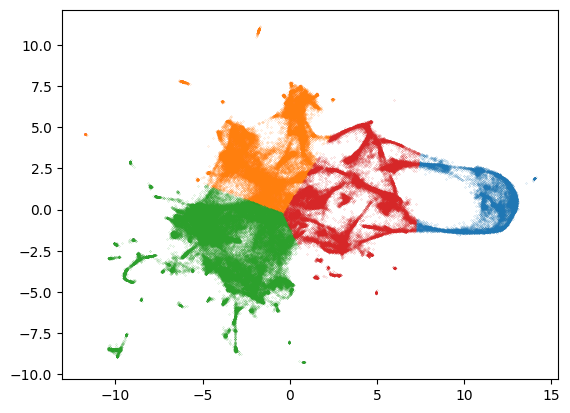

In [36]:
for cl in range(k+1):
    mask = df_filter['k_means'] == cl
    df = df_filter[mask]

    plt.scatter(df['x'], df['y'],
                s = 0.01)

In [86]:
mask_pos = (df_all['y'] > -5) & (df_all['x'] < 18)

df_filter = df_all[mask_pos].copy()

X = df_filter[['x', 'y']].values

In [87]:
dbscan = DBSCAN(eps=0.5, min_samples=40)
labels_dbscan = dbscan.fit_predict(X)

In [88]:
df_filter['dbscan'] = labels_dbscan

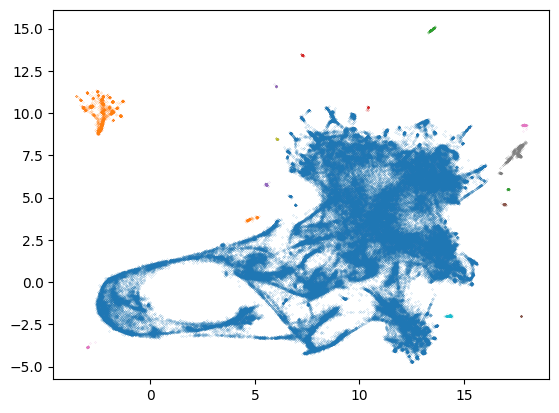

In [89]:
df_filter = df_filter[df_filter['dbscan'] != -1]
for cl in list(df_filter['dbscan'].unique()):
    mask = df_filter['dbscan'] == cl
    df = df_filter[mask]

    plt.scatter(df['x'], df['y'],
                s = 0.01)

# Manually clean 2d feat

In [28]:
# root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'
# experiment_path = f'{root}/maria_v2/feat_2d'
feat_path_12 = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/develop_nb/LS_2d_clean_vowels.csv'

df_anotated_12 = pd.read_csv(feat_path_12, index_col=0)

mask = (df_anotated_12['phone_base'] != 'SP')

df_anotated_12 = df_anotated_12[mask]

In [29]:
vowels = ['a', 'e', 'i', 'o', 'u', '3', 'w', '0','y']
AP = ['AP']

df_consonant = df_anotated_12[~df_anotated_12['phone_base'].isin(vowels + AP)].copy()
df_vowels = df_anotated_12[df_anotated_12['phone_base'].isin(vowels)].copy()
df_ap = df_anotated_12[df_anotated_12['phone_base'].isin(AP)].copy()

df_ap['group'] = 'AP'
df_vowels['group'] = 'vowel'
df_consonant['group'] = 'consonant'

df_all = pd.concat([df_consonant, df_vowels, df_ap])

In [30]:
ph_group = {
    'consonants': list(df_consonant['phone_base'].unique()),
    'vowels': list(df_vowels['phone_base'].unique()),
    'AP': list(df_ap['phone_base'].unique())
    }

Making a 2d plot


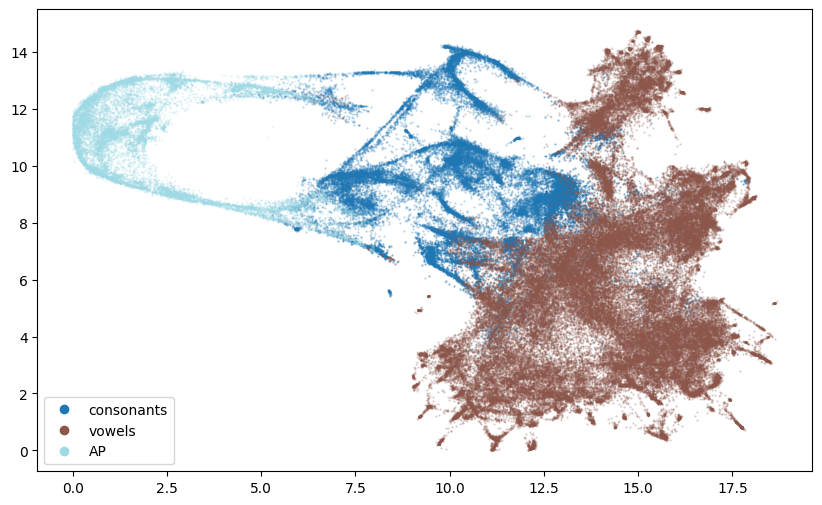

In [31]:
plots.make_tagged_LS_plot(df_all,
                phones = ph_group,
                figsize = (10, 6),
                alpha = 0.3, 
                s = 0.3, 
                show_global = False,
                add_legend = True,
                label_detail = False,
                save_fig = False,
                ax = None);

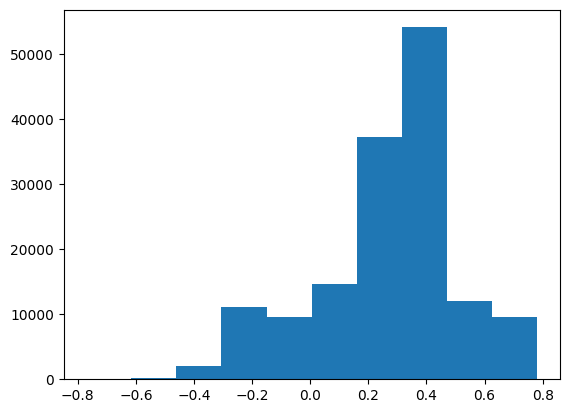

In [33]:
X = df_all[['x', 'y']].values
y = df_all['group'].values
sample_silhouette_values = silhouette_samples(X, y)
plt.hist(sample_silhouette_values);

In [35]:
sample_silhouette_values.mean()

0.2798575512185264